## M345SC 2019 Lab 6

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

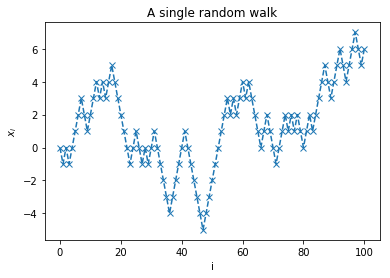

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()


Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

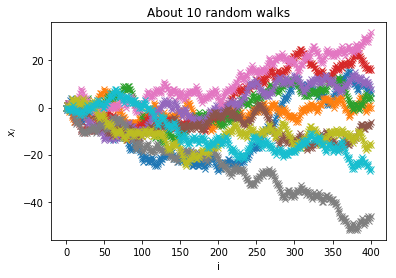

dt=0.625403


In [3]:
from time import time
import numpy as np
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

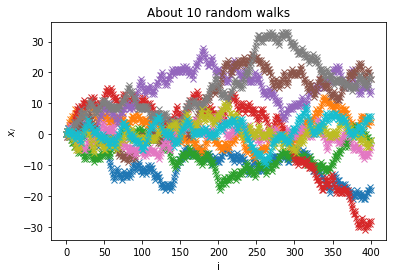

dt=0.002689


In [4]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))
    
    random_choices = np.random.choice(a = (-1, 1), size = (Nt + 1, M))

    t1 = time()
    
    #**Modify code below and add code here**
    
    #M Nt-step random walks
    for i in range(Nt):
        x[i+1,:] = x[i,:] + random_choices[i, :]

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk2(display=True)
print("dt=%f" %out[1])

How much faster is your new function?

Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


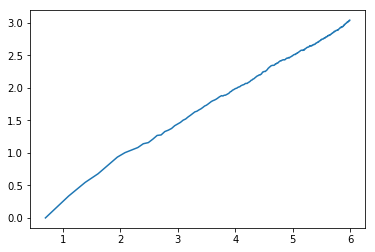

In [14]:
#Add code here
sd  = np.std(out[0], axis = 1)
N = np.linspace(1, 401, 401)
plt.plot(np.log(N), np.log(sd))
plt.show()

    

### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [17]:
import numpy as np
#Add code here
M = np.random.rand(3, 3)
print (M)

[[0.28601955 0.4226905  0.57411438]
 [0.86117426 0.17256596 0.83714016]
 [0.51543742 0.09118716 0.15322531]]


2) Compute the eigenvalues and eigenvectors of N:

In [28]:
#Add code here
evalue, evector = np.linalg.eig(M)
print (evalue)
print (evector)


[ 1.19970394+0.j         -0.29394656+0.04744065j -0.29394656-0.04744065j]
[[ 0.56326161+0.j        -0.60740526+0.1054571j -0.60740526-0.1054571j]
 [ 0.75175168+0.j        -0.17893104-0.2128679j -0.17893104+0.2128679j]
 [ 0.34293697+0.j         0.73661971+0.j         0.73661971-0.j       ]]


3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [24]:
#Add code here
np.linalg.det(M - evalue[0] * np.eye(3))


(-2.2960424163406795e-15+0j)

4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [30]:
#Add code here
np.matmul(M, evector[:, 0]) - evalue[0] * evector[:, 0]

array([-5.55111512e-16+0.j, -8.88178420e-16+0.j, -4.44089210e-16+0.j])